# 0 Load data

一般我自己现在处理数据，我大多遵循厘清数据逻辑→测试样本→批量上线→优化输出的步骤。

按照奥姆剃刀原则，若无必要、无增实体。按照我们目前的水平，我们不会涉及图神经网络、不会涉及边界复杂的矢量数据编辑。所以大多操作对于AI很简单，而且一旦看到AI生成高度复杂的代码，第一感觉应该是毙掉它。

## 0.1 Sample test

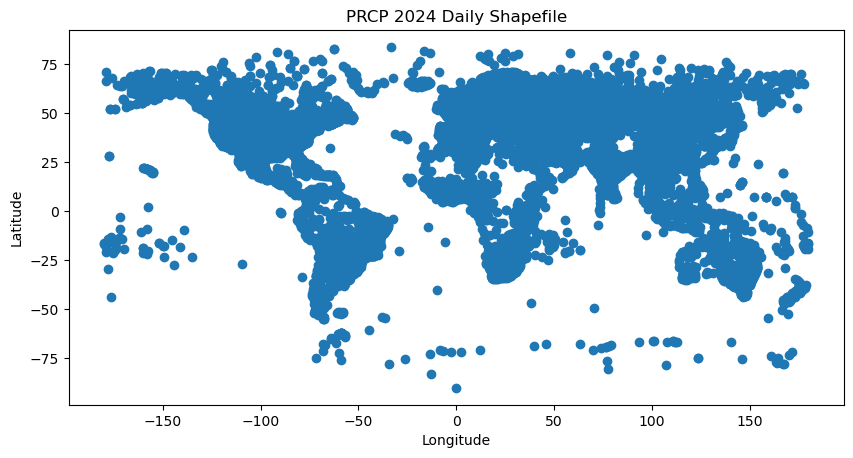

In [2]:
import geopandas as gpd
import os

# Define the path to the shapefile
shapefile_dir = r"D:\world_rain\shp_format"
shapefile_name = "PRCP_2024_daily.shp"
shapefile_path = os.path.join(shapefile_dir, shapefile_name)

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Plot the geodataframe
gdf.plot(figsize=(10, 8))
import matplotlib.pyplot as plt
plt.title("PRCP 2024 Daily Shapefile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [34]:
gdf

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,statement,2024-01-01,2024-01-02,2024-01-03,2024-01-04,...,2024-12-24,2024-12-25,2024-12-26,2024-12-27,2024-12-28,2024-12-29,2024-12-30,2024-12-31,geometry,max_2024
0,01001099999,"JAN MAYEN NOR NAVY, NO",70.933333,-8.666667,9.00,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,0.25,99.99,0.00,0.00,...,1.02,6.35,2.29,0.76,2.29,3.05,1.02,1.02,POINT (-8.66667 70.93333),99.99
1,01001499999,"SORSTOKKEN, NO",59.791925,5.340850,48.76,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,99.99,0.00,0.00,0.00,...,99.99,99.99,99.99,99.99,99.99,99.99,99.99,0.00,POINT (5.34085 59.79192),99.99
2,01002099999,"VERLEGENHUKEN, NO",80.050000,16.250000,8.00,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,0.00,99.99,0.00,0.00,...,0.00,0.00,99.99,0.00,99.99,0.00,0.00,0.00,POINT (16.25 80.05),99.99
3,01003099999,"HORNSUND, NO",77.000000,15.500000,12.00,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,1.27,0.00,0.00,0.00,...,0.00,1.02,0.25,3.05,99.99,0.25,0.00,0.00,POINT (15.5 77),99.99
4,01006099999,"EDGEOYA, NO",78.250000,22.816667,14.00,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,99.99,0.00,99.99,0.00,...,99.99,99.99,99.99,99.99,0.00,0.00,99.99,99.99,POINT (22.81667 78.25),99.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12116,A0735500241,"VIROQUA MUNICIPAL AIRPORT, WI US",43.579000,-90.913000,394.10,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,0.00,0.00,0.00,0.00,...,99.99,99.99,99.99,99.99,99.99,99.99,99.99,99.99,POINT (-90.913 43.579),99.99
12117,A0735700182,ELBOW LAKE MUNICIPAL PRIDE OF THE PRAIRIE AIRP...,45.986000,-95.992000,367.30,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,0.00,0.00,99.99,99.99,...,99.99,99.99,99.99,99.99,99.99,99.99,99.99,99.99,POINT (-95.992 45.986),99.99
12118,A0735900240,"IONIA CO AIRPORT, MI US",42.938000,-85.061000,249.00,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,99.99,0.00,99.99,99.99,...,99.99,99.99,99.99,99.99,99.99,99.99,99.99,99.99,POINT (-85.061 42.938),99.99
12119,A5125500445,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",32.463830,-87.954050,34.10,该数据由立方数据学社整理，欢迎关注立方数据学社公众号！,0.00,0.00,99.99,0.00,...,0.00,99.99,99.99,99.99,99.99,99.99,0.00,0.00,POINT (-87.95405 32.46383),99.99


In [102]:
# For each row, select the max value from the columns that begin with '2024'
import pandas as pd
import numpy as np

# Reserve only the specified columns and the 2024 columns for further processing
reserved_cols = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']
cols_2024 = [col for col in gdf.columns if col.startswith('2024')]

# Replace 99.99 with NaN, then get the max value for each row (ignoring NaN) 
gdf_filtered = gdf[reserved_cols + cols_2024].copy()  


# Exclude 99.99 for statistics （you can also exclude 0）
def exclude_vals(arr):
    arr = arr.replace(99.99, np.nan)
    # arr = arr.replace(0, np.nan)
    return arr

gdf_filtered.loc[:, 'max_2024'] = exclude_vals(gdf_filtered[cols_2024]).max(axis=1, skipna=True)
gdf_filtered.drop(columns=cols_2024)
# gdf_filtered.loc[:, 'median_2024'] = exclude_vals(gdf_filtered[cols_2024]).median(axis=1, skipna=True)
# gdf_filtered.loc[:, 'q99_2024'] = exclude_vals(gdf_filtered[cols_2024]).quantile(0.99, axis=1, interpolation='linear')

# # Add the second largest value (次大值)
# def second_largest(row):
#     vals = row.replace(99.99, np.nan).dropna()
#     if len(vals) < 2:
#         return np.nan
#     return np.sort(vals)[-2]

# gdf_filtered.loc[:, 'second_max_2024'] = exclude_vals(gdf_filtered[cols_2024]).apply(second_largest, axis=1)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,max_2024
0,01001099999,"JAN MAYEN NOR NAVY, NO",70.933333,-8.666667,9.00,34.54
1,01001499999,"SORSTOKKEN, NO",59.791925,5.340850,48.76,0.00
2,01002099999,"VERLEGENHUKEN, NO",80.050000,16.250000,8.00,0.00
3,01003099999,"HORNSUND, NO",77.000000,15.500000,12.00,59.94
4,01006099999,"EDGEOYA, NO",78.250000,22.816667,14.00,0.00
...,...,...,...,...,...,...
12116,A0735500241,"VIROQUA MUNICIPAL AIRPORT, WI US",43.579000,-90.913000,394.10,0.00
12117,A0735700182,ELBOW LAKE MUNICIPAL PRIDE OF THE PRAIRIE AIRP...,45.986000,-95.992000,367.30,0.00
12118,A0735900240,"IONIA CO AIRPORT, MI US",42.938000,-85.061000,249.00,0.00
12119,A5125500445,"DEMOPOLIS MUNICIPAL AIRPORT, AL US",32.463830,-87.954050,34.10,0.00


## 0.2 Geometry process

In [ ]:
from shapely.geometry import Polygon 
import geopandas as gpd
import os

world_shp = gpd.read_file(r"D:\world_rain\Export_Output.shp")
gdf_filtered.drop(columns=cols_2024)

In [80]:
world_shp

,GID_0,NAME_0,geometry
0,ABW,Aruba,"POLYGON ((-69.9782 12.46986, -69.97847 12.4698..."
1,AFG,Afghanistan,"POLYGON ((68.52644 31.75435, 68.53852 31.75457..."
2,AGO,Angola,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -..."
3,AIA,Anguilla,"MULTIPOLYGON (((-63.42375 18.58903, -63.42375 ..."
4,ALA,?land,"MULTIPOLYGON (((21.32195 59.74986, 21.32195 59..."
...,...,...,...
251,XSP,Spratly Islands,"MULTIPOLYGON (((114.35472 11.45139, 114.35416 ..."
252,YEM,Yemen,"MULTIPOLYGON (((53.26931 12.12875, 53.26931 12..."
253,ZAF,South Africa,"MULTIPOLYGON (((19.42097 -34.67903, 19.42097 -..."
254,ZMB,Zambia,"POLYGON ((25.88753 -17.98407, 25.88284 -17.984..."


In [93]:
# 1. Assign each row in gdf_filtered to a country in world_shp based on LATITUDE and LONGITUDE
# 2. For each country, aggregate 'max_2024' using max, median, and second largest value

# 只清理可能存在的重复索引列
spatial_join_cols = ['index_right', 'index_left','geometry','GID_0'] 
for col in spatial_join_cols:
    if col in gdf_filtered.columns:
        gdf_filtered = gdf_filtered.drop(columns=[col])

# Ensure geometry column exists in gdf_filtered
if 'geometry' not in gdf_filtered.columns:
    from shapely.geometry import Point
    gdf_filtered['geometry'] = gdf_filtered.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)

# Convert to GeoDataFrame if not already
if not isinstance(gdf_filtered, gpd.GeoDataFrame):
    gdf_filtered = gpd.GeoDataFrame(gdf_filtered, geometry='geometry', crs=world_shp.crs)

# Spatial join to assign country to each station
gdf_filtered = gpd.sjoin(gdf_filtered, world_shp[['geometry', 'GID_0']], how='left', predicate='within')

# Aggregate by country
def second_largest(series):
    vals = series.replace(99.99, np.nan).dropna()
    if len(vals) < 2:
        return np.nan
    return np.sort(vals)[-2]

agg_df = gdf_filtered.groupby('GID_0').agg(
    max_2024_max=('max_2024', 'max'),
    max_2024_median=('max_2024', 'median'),
    max_2024_second_max=('max_2024', second_largest)
).reset_index()

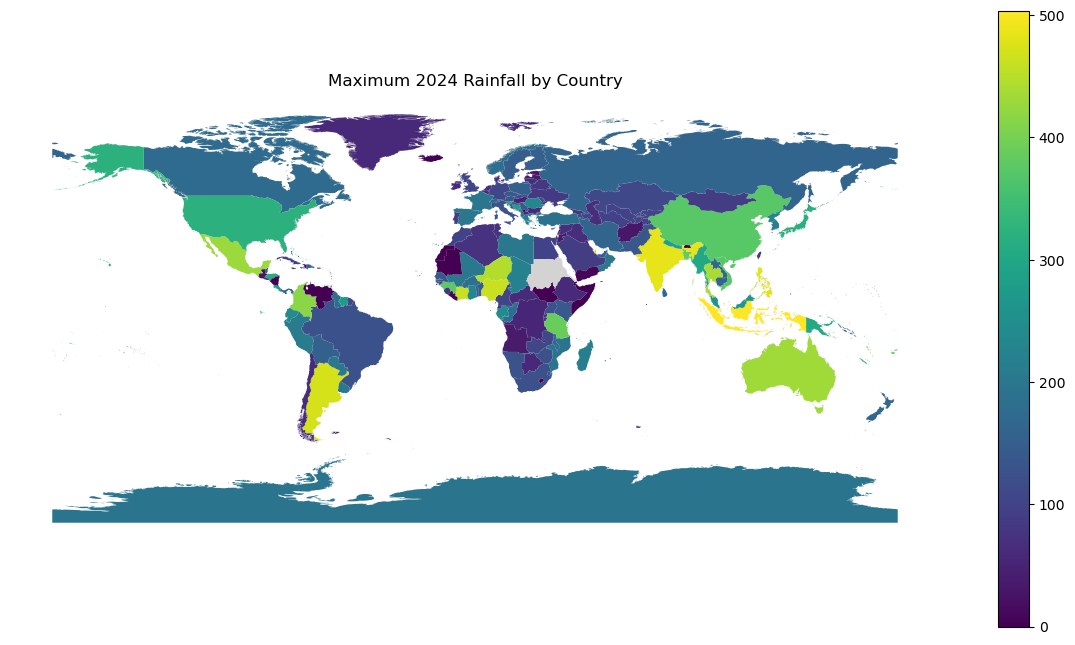

In [97]:
# Merge agg_df with world_shp on 'GID_0'
world_shp_agg = world_shp.merge(agg_df, on='GID_0', how='left')

# Plot the result, coloring by max_2024_max
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
world_shp_agg.plot(column='max_2024_max', ax=ax, legend=True, cmap='viridis', missing_kwds={"color": "lightgrey"})
ax.set_title('Maximum 2024 Rainfall by Country')
ax.axis('off')
plt.show()

In [99]:
# Select countries where max_2024_max is null (NaN)
null_countries = world_shp_agg[world_shp_agg['max_2024_max'].isnull()]
null_countries

,GID_0,NAME_0,geometry,max_2024_max,max_2024_median,max_2024_second_max
6,AND,Andorra,"POLYGON ((1.56324 42.45882, 1.5612 42.45871, 1...",NaN,NaN,NaN
33,BRB,Barbados,"POLYGON ((-59.47375 13.07705, -59.47375 13.076...",NaN,NaN,NaN
36,BVT,Bouvet Island,"MULTIPOLYGON (((3.35745 -54.39033, 3.35833 -54...",NaN,NaN,NaN
54,CUW,Cura?ao,"MULTIPOLYGON (((-68.87764 12.07319, -68.8782 1...",NaN,NaN,NaN
67,ERI,Eritrea,"MULTIPOLYGON (((42.58264 13.17264, 42.58264 13...",NaN,NaN,NaN
90,GRD,Grenada,"MULTIPOLYGON (((-61.78597 11.98903, -61.78597 ...",NaN,NaN,NaN
97,HMD,Heard Island and McDonald Islands,"MULTIPOLYGON (((73.57027 -52.90389, 73.57001 -...",NaN,NaN,NaN
136,MAF,Saint-Martin,"MULTIPOLYGON (((-62.96986 18.12597, -62.96986 ...",NaN,NaN,NaN
138,MCO,Monaco,"MULTIPOLYGON (((7.41338 43.73459, 7.4363 43.75...",NaN,NaN,NaN
169,NRU,Nauru,"POLYGON ((166.92877 -0.55353, 166.92828 -0.553...",NaN,NaN,NaN


# 1 Batch process 

## 1.1 Load data

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os 
import re

# Define the directory containing the shapefiles
shapefile_dir = r"D:\world_rain\shp_format"
world_shp = gpd.read_file(r"D:\world_rain\Export_Output.shp")

# List to store tuples of (filename, year)
prcp_shp_files = []

# Iterate over files in the directory
for fname in os.listdir(shapefile_dir):
    # Check if the file is a shapefile and starts with 'PRCP_'
    if fname.endswith('.shp') and fname.startswith('PRCP_'):
        # Try to extract the year using regex
        match = re.search(r'PRCP_(\d{4})', fname)
        if match:
            year = match.group(1)
            prcp_shp_files.append((fname, year))

# prcp_shp_files now contains a list of (filename, year) for all matching shapefiles


## 1.2 Generate csv for each country 

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import os
import re
from tqdm import tqdm

# Initialize the final aggregated dataframe
world_shp_agg = world_shp.copy()

# Process each year's shapefile using tqdm for progress indication
for filename, year in tqdm(prcp_shp_files, desc="Processing yearly shapefiles"):
    # Load the shapefile
    shapefile_path = os.path.join(shapefile_dir, filename)
    gdf = gpd.read_file(shapefile_path)
    
    # Reserve only the specified columns and the year columns for further processing
    reserved_cols = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']
    cols_year = [col for col in gdf.columns if col.startswith(year)]
    
    # Create filtered dataframe
    gdf_filtered = gdf[reserved_cols + cols_year].copy()
    
    # Exclude 99.99 for statistics
    def exclude_vals(arr):
        arr = arr.replace(99.99, np.nan)
        return arr
    
    # Calculate maximum value for the year
    gdf_filtered.loc[:, f'max_{year}'] = exclude_vals(gdf_filtered[cols_year]).max(axis=1, skipna=True)
    
    # Clean up any existing spatial join columns
    spatial_join_cols = ['index_right', 'index_left', 'geometry', 'GID_0']
    for col in spatial_join_cols:
        if col in gdf_filtered.columns:
            gdf_filtered = gdf_filtered.drop(columns=[col])
    
    # Ensure geometry column exists
    if 'geometry' not in gdf_filtered.columns:
        gdf_filtered['geometry'] = gdf_filtered.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
    
    # Convert to GeoDataFrame
    if not isinstance(gdf_filtered, gpd.GeoDataFrame):
        gdf_filtered = gpd.GeoDataFrame(gdf_filtered, geometry='geometry', crs=world_shp.crs)
    
    # Spatial join to assign country to each station
    gdf_filtered = gpd.sjoin(gdf_filtered, world_shp[['geometry', 'GID_0']], how='left', predicate='within')
    
    # Aggregate by country for this year, including max, median, and second max (excluding 99.99)
    def second_largest(series):
        vals = series.replace(99.99, np.nan).dropna()
        if len(vals) < 2:
            return np.nan
        return np.sort(vals)[-2]

    agg_df_year = gdf_filtered.groupby('GID_0').agg(
        **{f'max_{year}_max': (f'max_{year}', 'max'),
           f'max_{year}_median': (f'max_{year}', 'median'),
           f'max_{year}_second_max': (f'max_{year}', second_largest)}
    ).reset_index()
    # Merge with world_shp_agg
    world_shp_agg = world_shp_agg.merge(agg_df_year, on='GID_0', how='left')

print("All years processed successfully!")

print(f"Final columns: {world_shp_agg.columns.tolist()}")

Processing yearly shapefiles:   0%|          | 0/96 [00:00<?, ?it/s]

Processing yearly shapefiles: 100%|██████████| 96/96 [06:07<00:00,  3.82s/it]

All years processed successfully!
Final columns: ['GID_0', 'NAME_0', 'geometry', 'max_1929_max', 'max_1929_median', 'max_1929_second_max', 'max_1930_max', 'max_1930_median', 'max_1930_second_max', 'max_1931_max', 'max_1931_median', 'max_1931_second_max', 'max_1932_max', 'max_1932_median', 'max_1932_second_max', 'max_1933_max', 'max_1933_median', 'max_1933_second_max', 'max_1934_max', 'max_1934_median', 'max_1934_second_max', 'max_1935_max', 'max_1935_median', 'max_1935_second_max', 'max_1936_max', 'max_1936_median', 'max_1936_second_max', 'max_1937_max', 'max_1937_median', 'max_1937_second_max', 'max_1938_max', 'max_1938_median', 'max_1938_second_max', 'max_1939_max', 'max_1939_median', 'max_1939_second_max', 'max_1940_max', 'max_1940_median', 'max_1940_second_max', 'max_1941_max', 'max_1941_median', 'max_1941_second_max', 'max_1942_max', 'max_1942_median', 'max_1942_second_max', 'max_1943_max', 'max_1943_median', 'max_1943_second_max', 'max_1944_max', 'max_1944_median', 'max_1944_seco

In [3]:
world_shp_agg

,GID_0,NAME_0,geometry,max_1929_max,max_1929_median,max_1929_second_max,max_1930_max,max_1930_median,max_1930_second_max,max_1931_max,...,max_2021_second_max,max_2022_max,max_2022_median,max_2022_second_max,max_2023_max,max_2023_median,max_2023_second_max,max_2024_max,max_2024_median,max_2024_second_max
0,ABW,Aruba,"POLYGON ((-69.9782 12.46986, -69.97847 12.4698...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,38.35,38.350,NaN,182.63,182.630,NaN,182.37,182.370,NaN
1,AFG,Afghanistan,"POLYGON ((68.52644 31.75435, 68.53852 31.75457...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.88,50.04,36.070,36.07,99.06,7.870,7.87,29.97,12.950,12.95
2,AGO,Angola,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.93,283.97,35.055,95.00,95.00,0.000,59.94,36.07,0.000,17.02
3,AIA,Anguilla,"MULTIPOLYGON (((-63.42375 18.58903, -63.42375 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,28.70,14.350,0.00,124.97,62.485,0.00,49.53,24.765,0.00
4,ALA,?land,"MULTIPOLYGON (((21.32195 59.74986, 21.32195 59...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,23.11,0.000,0.00,33.02,0.000,0.00,25.91,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,XSP,Spratly Islands,"MULTIPOLYGON (((114.35472 11.45139, 114.35416 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,YEM,Yemen,"MULTIPOLYGON (((53.26931 12.12875, 53.26931 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.03,0.000,0.00,7.11,0.000,0.51
253,ZAF,South Africa,"MULTIPOLYGON (((19.42097 -34.67903, 19.42097 -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,170.94,206.76,40.385,201.93,180.09,38.100,176.02,122.94,35.560,106.93
254,ZMB,Zambia,"POLYGON ((25.88753 -17.98407, 25.88284 -17.984...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.09,91.95,8.890,81.03,89.92,2.540,62.99,105.92,7.870,57.91


In [4]:
world_shp_agg.to_csv('data_output/world_shp_agg.csv', index=False)

## 1.3 Gumble_fun

def Gumble_func(data,N,length):
    #  data应为一列数据
    #  N为多少年一遇
    #  length为所用数据年数(从大到小排序后希望获得前几个数据)
    #  Recurrence_period_value为N年一遇值
    # data = pd.read_excel(file_path)
    # data = np.array(data)
    # N = 100
    # length = 100
    datasort = np.sort(data, axis=0)[::-1] # 从大到小排列
    data_select_sorts = datasort[0:length - 1]
    mu = np.mean(data_select_sorts)
    sum_mm = 0
    for data_select_sort in data_select_sorts:
        sum_mm = sum_mm + (data_select_sort - mu) ** 2
    sigma = np.sqrt(sum_mm / (len(data_select_sorts) - 1))  # 标准差
    alpha = np.pi / (np.sqrt(6) * sigma)
    u = mu - 0.57721 / alpha
    for i in np.arange(1, 999999, 0.1):  # 降水量设置为1~999999mm
        if 1 / N >= 1 - np.exp(-np.exp(-alpha * (i - u))):  # N年一遇
            Recurrence_period_value = i  # Recurrence_period_value即为N年一遇降水值
            print(str(N)+'年一遇降水值：',Recurrence_period_value,'毫米')
            break
    return Recurrence_period_value

In [12]:
# Apply Gumbel function to world_shp_agg.csv data
import pandas as pd
import numpy as np
from tqdm import tqdm

# Load the CSV file
# df = pd.read_csv('data_output/world_shp_agg.csv')
df= world_shp_agg
# Find columns that contain maximum rainfall data for 1950-2024 only
max_rainfall_cols = [col for col in df.columns if col.startswith('max_') and col.endswith('_max') and 'second_max' not in col]

# Filter to only include 1950-2024 years
years_1950_2024 = []
for col in max_rainfall_cols:
    # Extract year from column name (e.g., 'max_2020_max' -> '2020')
    year_str = col.replace('max_', '').replace('_max', '')
    try:
        year = int(year_str)
        if 1950 <= year <= 2024:
            years_1950_2024.append(col)
    except ValueError:
        continue

print(f"Years 1950-2024 rainfall columns: {sorted(years_1950_2024)}")

def Gumble_func(data, N, length):
    #  data应为一列数据
    #  N为多少年一遇
    #  length为所用数据年数(从大到小排序后希望获得前几个数据)
    #  Recurrence_period_value为N年一遇值
    
    # 过滤掉无效值（NaN, 0, 负数）
    data = data[~np.isnan(data)]
    data = data[data > 0]
    
    if len(data) < 3:
        return np.nan
    
    datasort = np.sort(data, axis=0)[::-1] # 从大到小排列
    data_select_sorts = datasort[0:min(length, len(datasort))]  # 取前length个值
    
    mu = np.mean(data_select_sorts)
    sum_mm = 0
    for data_select_sort in data_select_sorts:
        sum_mm = sum_mm + (data_select_sort - mu) ** 2
    sigma = np.sqrt(sum_mm / (len(data_select_sorts) - 1))  # 标准差
    alpha = np.pi / (np.sqrt(6) * sigma)
    u = mu - 0.57721 / alpha
    
    for i in np.arange(1, 999999, 0.1):  # 降水量设置为1~999999mm
        if 1 / N >= 1 - np.exp(-np.exp(-alpha * (i - u))):  # N年一遇
            Recurrence_period_value = i  # Recurrence_period_value即为N年一遇降水值
            print(str(N)+'年一遇降水值：',Recurrence_period_value,'毫米')
            break
    return Recurrence_period_value

# Apply Gumbel function to each country's time series
def apply_gumbel_to_country(row, max_cols, N=100, length=50):
    """
    Apply Gumbel function to a country's rainfall time series (1950-2024 only)
    """
    # Extract rainfall values for this country (1950-2024 only)
    rainfall_values = []
    for col in max_cols:
        if pd.notna(row[col]) and row[col] > 0:  # Skip NaN, zero, and negative values
            rainfall_values.append(row[col])
    
    # Need at least some data points
    if len(rainfall_values) < 3:
        return np.nan
    
    # Convert to numpy array
    data = np.array(rainfall_values)
    
    # Apply Gumbel function
    try:
        return Gumble_func(data, N, min(length, len(data)))
    except:
        return np.nan

# Calculate return period values for different periods using tqdm for progress
return_periods = [10, 20, 50, 100]  # years

for N in return_periods:
    print(f"\nCalculating {N}-year return period values for 1950-2024...")
    tqdm.pandas(desc=f"Return period {N}yr")
    df[f'return_{N}yr_1950_2024'] = list(
        tqdm(
            (apply_gumbel_to_country(row, years_1950_2024, N=N, length=50) for _, row in df.iterrows()),
            total=len(df),
            desc=f"Return period {N}yr"
        )
    )

# # Save the results with max rainfall data
# output_file = 'data_output/world_shp_agg_with_return_periods_1950_2024.csv'
# df.to_csv(output_file, index=False)
# print(f"\nResults saved to: {output_file}")

# # Display summary statistics
# print("\nSummary of return period calculations (1950-2024):")
# for N in return_periods:
#     col_name = f'return_{N}yr_1950_2024'
#     valid_count = df[col_name].notna().sum()
#     print(f"{N}-year return period: {valid_count} countries with valid values")
#     if valid_count > 0:
#         print(f"  Mean: {df[col_name].mean():.2f} mm")
#         print(f"  Max: {df[col_name].max():.2f} mm")
#         print(f"  Min: {df[col_name].min():.2f} mm")

Years 1950-2024 rainfall columns: ['max_1950_max', 'max_1951_max', 'max_1952_max', 'max_1953_max', 'max_1954_max', 'max_1955_max', 'max_1956_max', 'max_1957_max', 'max_1958_max', 'max_1959_max', 'max_1960_max', 'max_1961_max', 'max_1962_max', 'max_1963_max', 'max_1964_max', 'max_1965_max', 'max_1966_max', 'max_1967_max', 'max_1968_max', 'max_1969_max', 'max_1970_max', 'max_1971_max', 'max_1972_max', 'max_1973_max', 'max_1974_max', 'max_1975_max', 'max_1976_max', 'max_1977_max', 'max_1978_max', 'max_1979_max', 'max_1980_max', 'max_1981_max', 'max_1982_max', 'max_1983_max', 'max_1984_max', 'max_1985_max', 'max_1986_max', 'max_1987_max', 'max_1988_max', 'max_1989_max', 'max_1990_max', 'max_1991_max', 'max_1992_max', 'max_1993_max', 'max_1994_max', 'max_1995_max', 'max_1996_max', 'max_1997_max', 'max_1998_max', 'max_1999_max', 'max_2000_max', 'max_2001_max', 'max_2002_max', 'max_2003_max', 'max_2004_max', 'max_2005_max', 'max_2006_max', 'max_2007_max', 'max_2008_max', 'max_2009_max', 'max_

Return period 10yr:   2%|▏         | 5/256 [00:00<00:05, 45.05it/s]

10年一遇降水值： 331.8000000000003 毫米
10年一遇降水值： 178.80000000000015 毫米
10年一遇降水值： 176.30000000000015 毫米
10年一遇降水值： 108.40000000000009 毫米
10年一遇降水值： 101.20000000000009 毫米
10年一遇降水值： 206.6000000000002 毫米
10年一遇降水值： 249.00000000000023 毫米
10年一遇降水值： 486.70000000000044 毫米
10年一遇降水值： 219.2000000000002 毫米


Return period 10yr:   4%|▍         | 11/256 [00:00<00:04, 49.05it/s]

10年一遇降水值： 313.2000000000003 毫米


Return period 10yr:   6%|▋         | 16/256 [00:00<00:05, 46.83it/s]

10年一遇降水值： 136.1000000000001 毫米
10年一遇降水值： 243.9000000000002 毫米
10年一遇降水值： 257.7000000000002 毫米
10年一遇降水值： 413.2000000000004 毫米
10年一遇降水值： 225.3000000000002 毫米
10年一遇降水值： 288.2000000000003 毫米
10年一遇降水值： 220.5000000000002 毫米
10年一遇降水值： 274.30000000000024 毫米
10年一遇降水值： 273.0000000000002 毫米


Return period 10yr:  10%|█         | 26/256 [00:00<00:05, 44.41it/s]

10年一遇降水值： 249.00000000000023 毫米
10年一遇降水值： 282.90000000000026 毫米
10年一遇降水值： 413.30000000000035 毫米
10年一遇降水值： 360.4000000000003 毫米
10年一遇降水值： 167.20000000000016 毫米
10年一遇降水值： 345.6000000000003 毫米
10年一遇降水值： 243.8000000000002 毫米
10年一遇降水值： 262.2000000000002 毫米
10年一遇降水值： 288.7000000000003 毫米


Return period 10yr:  15%|█▍        | 38/256 [00:00<00:04, 49.08it/s]

10年一遇降水值： 325.7000000000003 毫米
10年一遇降水值： 159.40000000000015 毫米
10年一遇降水值： 383.50000000000034 毫米
10年一遇降水值： 466.90000000000043 毫米
10年一遇降水值： 346.20000000000033 毫米
10年一遇降水值： 257.60000000000025 毫米
10年一遇降水值： 180.00000000000017 毫米
10年一遇降水值： 394.10000000000036 毫米
10年一遇降水值： 285.0000000000002 毫米
10年一遇降水值： 169.60000000000014 毫米


Return period 10yr:  19%|█▉        | 48/256 [00:01<00:04, 45.57it/s]

10年一遇降水值： 251.20000000000022 毫米
10年一遇降水值： 318.2000000000003 毫米
10年一遇降水值： 467.40000000000043 毫米
10年一遇降水值： 443.9000000000004 毫米
10年一遇降水值： 385.4000000000003 毫米
10年一遇降水值： 268.80000000000024 毫米
10年一遇降水值： 404.10000000000036 毫米
10年一遇降水值： 264.60000000000025 毫米
10年一遇降水值： 451.7000000000004 毫米
10年一遇降水值： 359.6000000000003 毫米


Return period 10yr:  23%|██▎       | 58/256 [00:01<00:04, 44.27it/s]

10年一遇降水值： 168.70000000000016 毫米
10年一遇降水值： 452.7000000000004 毫米
10年一遇降水值： 383.4000000000003 毫米
10年一遇降水值： 342.4000000000003 毫米
10年一遇降水值： 143.0000000000001 毫米
10年一遇降水值： 169.60000000000014 毫米
10年一遇降水值： 147.90000000000012 毫米
10年一遇降水值： 212.2000000000002 毫米
10年一遇降水值： 319.6000000000003 毫米
10年一遇降水值： 156.90000000000015 毫米


Return period 10yr:  27%|██▋       | 68/256 [00:01<00:04, 44.18it/s]

10年一遇降水值： 273.60000000000025 毫米
10年一遇降水值： 242.70000000000022 毫米
10年一遇降水值： 297.5000000000003 毫米
10年一遇降水值： 277.80000000000024 毫米
10年一遇降水值： 373.30000000000035 毫米
10年一遇降水值： 175.70000000000016 毫米
10年一遇降水值： 87.10000000000008 毫米
10年一遇降水值： 30.900000000000027 毫米
10年一遇降水值： 320.5000000000003 毫米
10年一遇降水值： 241.9000000000002 毫米


Return period 10yr:  30%|███       | 78/256 [00:01<00:04, 44.09it/s]

10年一遇降水值： 292.80000000000024 毫米
10年一遇降水值： 176.00000000000014 毫米
10年一遇降水值： 383.9000000000003 毫米
10年一遇降水值： 79.00000000000007 毫米
10年一遇降水值： 315.3000000000003 毫米
10年一遇降水值： 87.80000000000008 毫米
10年一遇降水值： 337.1000000000003 毫米
10年一遇降水值： 447.8000000000004 毫米
10年一遇降水值： 298.7000000000003 毫米
10年一遇降水值： 295.0000000000003 毫米


Return period 10yr:  34%|███▍      | 88/256 [00:01<00:03, 43.67it/s]

10年一遇降水值： 171.90000000000015 毫米
10年一遇降水值： 356.1000000000003 毫米
10年一遇降水值： 185.40000000000018 毫米
10年一遇降水值： 342.3000000000003 毫米
10年一遇降水值： 326.1000000000003 毫米
10年一遇降水值： 252.90000000000023 毫米
10年一遇降水值： 192.70000000000016 毫米
10年一遇降水值： 295.10000000000025 毫米
10年一遇降水值： 326.7000000000003 毫米


Return period 10yr:  39%|███▊      | 99/256 [00:02<00:03, 45.80it/s]

10年一遇降水值： 209.00000000000017 毫米
10年一遇降水值： 127.00000000000011 毫米
10年一遇降水值： 373.80000000000035 毫米
10年一遇降水值： 241.9000000000002 毫米
10年一遇降水值： 307.7000000000003 毫米
10年一遇降水值： 266.10000000000025 毫米
10年一遇降水值： 317.8000000000003 毫米
10年一遇降水值： 469.5000000000004 毫米
10年一遇降水值： 287.40000000000026 毫米
10年一遇降水值： 173.50000000000014 毫米


Return period 10yr:  43%|████▎     | 109/256 [00:02<00:03, 44.71it/s]

10年一遇降水值： 224.6000000000002 毫米
10年一遇降水值： 381.9000000000003 毫米
10年一遇降水值： 108.40000000000009 毫米
10年一遇降水值： 481.8000000000004 毫米
10年一遇降水值： 355.6000000000003 毫米
10年一遇降水值： 214.30000000000018 毫米
10年一遇降水值： 296.60000000000025 毫米
10年一遇降水值： 181.50000000000017 毫米
10年一遇降水值： 125.10000000000011 毫米
10年一遇降水值： 132.70000000000013 毫米


Return period 10yr:  46%|████▋     | 119/256 [00:02<00:03, 44.06it/s]

10年一遇降水值： 333.6000000000003 毫米
10年一遇降水值： 327.6000000000003 毫米
10年一遇降水值： 120.5000000000001 毫米
10年一遇降水值： 185.90000000000018 毫米
10年一遇降水值： 417.30000000000035 毫米
10年一遇降水值： 322.1000000000003 毫米
10年一遇降水值： 446.2000000000004 毫米
10年一遇降水值： 225.7000000000002 毫米
10年一遇降水值： 235.70000000000022 毫米


Return period 10yr:  50%|█████     | 129/256 [00:02<00:02, 44.08it/s]

10年一遇降水值： 265.90000000000026 毫米
10年一遇降水值： 278.10000000000025 毫米
10年一遇降水值： 335.3000000000003 毫米
10年一遇降水值： 224.4000000000002 毫米
10年一遇降水值： 300.0000000000003 毫米
10年一遇降水值： 122.2000000000001 毫米
10年一遇降水值： 222.1000000000002 毫米
10年一遇降水值： 244.3000000000002 毫米
10年一遇降水值： 292.60000000000025 毫米
10年一遇降水值： 95.80000000000008 毫米


Return period 10yr:  55%|█████▌    | 141/256 [00:03<00:02, 49.14it/s]

10年一遇降水值： 381.4000000000003 毫米
10年一遇降水值： 93.10000000000008 毫米
10年一遇降水值： 189.20000000000016 毫米
10年一遇降水值： 108.2000000000001 毫米
10年一遇降水值： 203.1000000000002 毫米
10年一遇降水值： 201.2000000000002 毫米
10年一遇降水值： 271.10000000000025 毫米
10年一遇降水值： 236.3000000000002 毫米
10年一遇降水值： 395.20000000000033 毫米


Return period 10yr:  57%|█████▋    | 146/256 [00:03<00:02, 46.96it/s]

10年一遇降水值： 137.30000000000013 毫米
10年一遇降水值： 480.3000000000004 毫米
10年一遇降水值： 215.6000000000002 毫米
10年一遇降水值： 178.50000000000017 毫米
10年一遇降水值： 374.1000000000003 毫米
10年一遇降水值： 175.50000000000014 毫米
10年一遇降水值： 331.4000000000003 毫米
10年一遇降水值： 230.70000000000022 毫米
10年一遇降水值： 251.40000000000023 毫米


Return period 10yr:  61%|██████▏   | 157/256 [00:03<00:02, 47.16it/s]

10年一遇降水值： 236.70000000000022 毫米
10年一遇降水值： 333.7000000000003 毫米
10年一遇降水值： 264.5000000000002 毫米
10年一遇降水值： 328.1000000000003 毫米
10年一遇降水值： 316.3000000000003 毫米
10年一遇降水值： 246.4000000000002 毫米
10年一遇降水值： 419.60000000000036 毫米
10年一遇降水值： 218.1000000000002 毫米
10年一遇降水值： 188.80000000000015 毫米


Return period 10yr:  65%|██████▌   | 167/256 [00:03<00:01, 44.80it/s]

10年一遇降水值： 257.5000000000002 毫米
10年一遇降水值： 333.7000000000003 毫米
10年一遇降水值： 172.70000000000016 毫米
10年一遇降水值： 357.1000000000003 毫米
10年一遇降水值： 389.30000000000035 毫米
10年一遇降水值： 205.7000000000002 毫米
10年一遇降水值： 300.10000000000025 毫米
10年一遇降水值： 238.70000000000022 毫米
10年一遇降水值： 257.9000000000002 毫米


Return period 10yr:  70%|██████▉   | 178/256 [00:03<00:01, 45.67it/s]

10年一遇降水值： 232.70000000000022 毫米
10年一遇降水值： 223.9000000000002 毫米
10年一遇降水值： 411.2000000000004 毫米
10年一遇降水值： 325.8000000000003 毫米
10年一遇降水值： 122.9000000000001 毫米
10年一遇降水值： 422.5000000000004 毫米
10年一遇降水值： 497.30000000000047 毫米
10年一遇降水值： 267.7000000000002 毫米
10年一遇降水值： 282.0000000000002 毫米
10年一遇降水值： 264.7000000000002 毫米


Return period 10yr:  73%|███████▎  | 188/256 [00:04<00:01, 44.95it/s]

10年一遇降水值： 278.30000000000024 毫米
10年一遇降水值： 302.90000000000026 毫米
10年一遇降水值： 281.0000000000002 毫米
10年一遇降水值： 267.0000000000002 毫米
10年一遇降水值： 81.80000000000007 毫米
10年一遇降水值： 276.5000000000002 毫米
10年一遇降水值： 184.60000000000016 毫米
10年一遇降水值： 322.0000000000003 毫米
10年一遇降水值： 357.8000000000003 毫米
10年一遇降水值： 339.5000000000003 毫米


Return period 10yr:  77%|███████▋  | 198/256 [00:04<00:01, 43.86it/s]

10年一遇降水值： 263.4000000000002 毫米
10年一遇降水值： 315.1000000000003 毫米
10年一遇降水值： 246.3000000000002 毫米
10年一遇降水值： 410.60000000000036 毫米
10年一遇降水值： 315.3000000000003 毫米
10年一遇降水值： 70.60000000000007 毫米
10年一遇降水值： 191.50000000000017 毫米
10年一遇降水值： 136.0000000000001 毫米
10年一遇降水值： 259.2000000000002 毫米


Return period 10yr:  82%|████████▏ | 209/256 [00:04<00:01, 45.88it/s]

10年一遇降水值： 298.5000000000003 毫米
10年一遇降水值： 223.3000000000002 毫米
10年一遇降水值： 68.80000000000005 毫米
10年一遇降水值： 140.20000000000013 毫米
10年一遇降水值： 207.1000000000002 毫米
10年一遇降水值： 128.2000000000001 毫米
10年一遇降水值： 185.80000000000015 毫米
10年一遇降水值： 287.40000000000026 毫米
10年一遇降水值： 185.00000000000017 毫米
10年一遇降水值： 252.10000000000022 毫米


Return period 10yr:  86%|████████▌ | 219/256 [00:04<00:00, 44.87it/s]

10年一遇降水值： 244.70000000000022 毫米
10年一遇降水值： 157.10000000000014 毫米
10年一遇降水值： 338.3000000000003 毫米
10年一遇降水值： 309.3000000000003 毫米
10年一遇降水值： 191.60000000000016 毫米
10年一遇降水值： 133.30000000000013 毫米
10年一遇降水值： 286.30000000000024 毫米
10年一遇降水值： 318.8000000000003 毫米
10年一遇降水值： 456.90000000000043 毫米


Return period 10yr:  88%|████████▊ | 224/256 [00:04<00:00, 44.45it/s]

10年一遇降水值： 246.8000000000002 毫米
10年一遇降水值： 170.10000000000014 毫米
10年一遇降水值： 285.60000000000025 毫米
10年一遇降水值： 132.5000000000001 毫米
10年一遇降水值： 361.1000000000003 毫米
10年一遇降水值： 357.20000000000033 毫米
10年一遇降水值： 206.90000000000018 毫米
10年一遇降水值： 315.1000000000003 毫米
10年一遇降水值： 462.40000000000043 毫米


Return period 10yr:  92%|█████████▏| 235/256 [00:05<00:00, 44.88it/s]

10年一遇降水值： 416.7000000000004 毫米
10年一遇降水值： 266.80000000000024 毫米
10年一遇降水值： 332.7000000000003 毫米
10年一遇降水值： 198.50000000000017 毫米
10年一遇降水值： 287.5000000000002 毫米
10年一遇降水值： 460.1000000000004 毫米
10年一遇降水值： 267.40000000000026 毫米
10年一遇降水值： 186.00000000000017 毫米
10年一遇降水值： 481.90000000000043 毫米


Return period 10yr:  96%|█████████▋| 247/256 [00:05<00:00, 47.47it/s]

10年一遇降水值： 152.30000000000013 毫米
10年一遇降水值： 425.5000000000004 毫米
10年一遇降水值： 386.60000000000036 毫米
10年一遇降水值： 235.70000000000022 毫米
10年一遇降水值： 229.0000000000002 毫米
10年一遇降水值： 76.10000000000007 毫米
10年一遇降水值： 241.20000000000022 毫米
10年一遇降水值： 144.90000000000012 毫米
10年一遇降水值： 119.0000000000001 毫米
10年一遇降水值： 284.0000000000002 毫米


Return period 10yr: 100%|██████████| 256/256 [00:05<00:00, 45.64it/s]


10年一遇降水值： 195.20000000000016 毫米
10年一遇降水值： 291.40000000000026 毫米
10年一遇降水值： 285.2000000000003 毫米
10年一遇降水值： 319.0000000000003 毫米

Calculating 20-year return period values for 1950-2024...


Return period 20yr:   2%|▏         | 4/256 [00:00<00:06, 37.91it/s]

20年一遇降水值： 411.9000000000004 毫米
20年一遇降水值： 212.40000000000018 毫米
20年一遇降水值： 219.30000000000018 毫米
20年一遇降水值： 133.20000000000013 毫米


Return period 20yr:   4%|▎         | 9/256 [00:00<00:05, 44.63it/s]

20年一遇降水值： 121.7000000000001 毫米
20年一遇降水值： 248.3000000000002 毫米
20年一遇降水值： 313.90000000000026 毫米
20年一遇降水值： 531.5000000000005 毫米
20年一遇降水值： 254.10000000000022 毫米


Return period 20yr:   5%|▌         | 14/256 [00:00<00:05, 43.07it/s]

20年一遇降水值： 367.70000000000033 毫米
20年一遇降水值： 158.50000000000014 毫米
20年一遇降水值： 292.60000000000025 毫米
20年一遇降水值： 317.8000000000003 毫米


Return period 20yr:   7%|▋         | 19/256 [00:00<00:05, 42.07it/s]

20年一遇降水值： 455.7000000000004 毫米
20年一遇降水值： 257.9000000000002 毫米
20年一遇降水值： 330.2000000000003 毫米
20年一遇降水值： 276.90000000000026 毫米
20年一遇降水值： 317.8000000000003 毫米
20年一遇降水值： 318.5000000000003 毫米
20年一遇降水值： 313.8000000000003 毫米
20年一遇降水值： 332.7000000000003 毫米
20年一遇降水值： 480.70000000000044 毫米


Return period 20yr:   9%|▉         | 24/256 [00:00<00:05, 41.86it/s]

20年一遇降水值： 421.60000000000036 毫米
20年一遇降水值： 211.2000000000002 毫米
20年一遇降水值： 411.4000000000004 毫米
20年一遇降水值： 286.0000000000002 毫米
20年一遇降水值： 336.5000000000003 毫米
20年一遇降水值： 334.5000000000003 毫米


Return period 20yr:  11%|█▏        | 29/256 [00:00<00:05, 42.04it/s]

20年一遇降水值： 393.10000000000036 毫米
20年一遇降水值： 184.60000000000016 毫米
20年一遇降水值： 439.60000000000036 毫米


Return period 20yr:  13%|█▎        | 34/256 [00:00<00:05, 41.97it/s]

20年一遇降水值： 527.2000000000005 毫米
20年一遇降水值： 431.9000000000004 毫米
20年一遇降水值： 298.5000000000003 毫米
20年一遇降水值： 209.5000000000002 毫米
20年一遇降水值： 468.6000000000004 毫米
20年一遇降水值： 312.90000000000026 毫米


Return period 20yr:  16%|█▌        | 41/256 [00:00<00:04, 47.67it/s]

20年一遇降水值： 208.40000000000018 毫米
20年一遇降水值： 281.0000000000002 毫米
20年一遇降水值： 372.9000000000003 毫米
20年一遇降水值： 501.50000000000045 毫米


Return period 20yr:  18%|█▊        | 46/256 [00:01<00:04, 45.43it/s]

20年一遇降水值： 511.00000000000045 毫米
20年一遇降水值： 451.0000000000004 毫米
20年一遇降水值： 325.7000000000003 毫米
20年一遇降水值： 474.6000000000004 毫米
20年一遇降水值： 302.2000000000003 毫米


Return period 20yr:  20%|█▉        | 51/256 [00:01<00:04, 43.91it/s]

20年一遇降水值： 514.8000000000004 毫米
20年一遇降水值： 438.3000000000004 毫米
20年一遇降水值： 204.1000000000002 毫米
20年一遇降水值： 525.9000000000004 毫米
20年一遇降水值： 441.60000000000036 毫米


Return period 20yr:  22%|██▏       | 56/256 [00:01<00:04, 43.30it/s]

20年一遇降水值： 431.8000000000004 毫米
20年一遇降水值： 168.40000000000015 毫米
20年一遇降水值： 203.00000000000017 毫米
20年一遇降水值： 177.10000000000016 毫米
20年一遇降水值： 243.10000000000022 毫米


Return period 20yr:  24%|██▍       | 61/256 [00:01<00:04, 43.43it/s]

20年一遇降水值： 365.50000000000034 毫米
20年一遇降水值： 200.50000000000017 毫米
20年一遇降水值： 328.7000000000003 毫米
20年一遇降水值： 286.80000000000024 毫米
20年一遇降水值： 337.5000000000003 毫米


Return period 20yr:  26%|██▌       | 66/256 [00:01<00:04, 43.35it/s]

20年一遇降水值： 323.5000000000003 毫米
20年一遇降水值： 451.3000000000004 毫米
20年一遇降水值： 209.00000000000017 毫米
20年一遇降水值： 108.5000000000001 毫米
20年一遇降水值： 38.30000000000003 毫米
20年一遇降水值： 355.50000000000034 毫米


Return period 20yr:  28%|██▊       | 71/256 [00:01<00:04, 43.62it/s]

20年一遇降水值： 282.0000000000002 毫米
20年一遇降水值： 350.6000000000003 毫米
20年一遇降水值： 201.60000000000016 毫米
20年一遇降水值： 440.8000000000004 毫米


Return period 20yr:  30%|██▉       | 76/256 [00:01<00:04, 43.47it/s]

20年一遇降水值： 96.20000000000009 毫米
20年一遇降水值： 350.5000000000003 毫米
20年一遇降水值： 101.6000000000001 毫米
20年一遇降水值： 388.60000000000036 毫米
20年一遇降水值： 514.3000000000004 毫米
20年一遇降水值： 340.1000000000003 毫米


Return period 20yr:  32%|███▏      | 81/256 [00:01<00:04, 43.27it/s]

20年一遇降水值： 338.1000000000003 毫米
20年一遇降水值： 216.6000000000002 毫米
20年一遇降水值： 428.5000000000004 毫米
20年一遇降水值： 220.7000000000002 毫米


Return period 20yr:  34%|███▎      | 86/256 [00:01<00:04, 42.11it/s]

20年一遇降水值： 404.50000000000034 毫米
20年一遇降水值： 403.50000000000034 毫米
20年一遇降水值： 302.8000000000003 毫米
20年一遇降水值： 233.3000000000002 毫米
20年一遇降水值： 356.50000000000034 毫米


Return period 20yr:  36%|███▌      | 91/256 [00:02<00:04, 39.71it/s]

20年一遇降水值： 363.9000000000003 毫米
20年一遇降水值： 258.30000000000024 毫米
20年一遇降水值： 141.70000000000013 毫米


Return period 20yr:  38%|███▊      | 96/256 [00:02<00:04, 36.73it/s]

20年一遇降水值： 449.0000000000004 毫米
20年一遇降水值： 281.90000000000026 毫米
20年一遇降水值： 357.1000000000003 毫米
20年一遇降水值： 323.8000000000003 毫米


Return period 20yr:  39%|███▉      | 100/256 [00:02<00:04, 37.18it/s]

20年一遇降水值： 370.9000000000003 毫米
20年一遇降水值： 529.5000000000005 毫米
20年一遇降水值： 328.5000000000003 毫米


Return period 20yr:  41%|████      | 104/256 [00:02<00:04, 35.36it/s]

20年一遇降水值： 219.80000000000018 毫米
20年一遇降水值： 267.60000000000025 毫米
20年一遇降水值： 428.60000000000036 毫米
20年一遇降水值： 132.1000000000001 毫米
20年一遇降水值： 517.4000000000004 毫米
20年一遇降水值： 420.0000000000004 毫米


Return period 20yr:  42%|████▏     | 108/256 [00:02<00:04, 32.96it/s]

20年一遇降水值： 252.70000000000022 毫米
20年一遇降水值： 346.5000000000003 毫米
20年一遇降水值： 223.6000000000002 毫米
20年一遇降水值： 144.10000000000014 毫米


Return period 20yr:  44%|████▍     | 112/256 [00:02<00:04, 31.36it/s]

20年一遇降水值： 152.00000000000014 毫米
20年一遇降水值： 363.3000000000003 毫米
20年一遇降水值： 387.80000000000035 毫米


Return period 20yr:  45%|████▌     | 116/256 [00:02<00:04, 30.14it/s]

20年一遇降水值： 156.60000000000014 毫米
20年一遇降水值： 222.3000000000002 毫米
20年一遇降水值： 441.2000000000004 毫米
20年一遇降水值： 351.1000000000003 毫米
20年一遇降水值： 510.40000000000043 毫米
20年一遇降水值： 264.0000000000002 毫米


Return period 20yr:  47%|████▋     | 120/256 [00:03<00:04, 29.28it/s]

20年一遇降水值： 283.5000000000002 毫米
20年一遇降水值： 311.40000000000026 毫米
20年一遇降水值： 344.8000000000003 毫米


Return period 20yr:  48%|████▊     | 123/256 [00:03<00:04, 28.75it/s]

20年一遇降水值： 354.1000000000003 毫米
20年一遇降水值： 279.40000000000026 毫米
20年一遇降水值： 344.6000000000003 毫米


Return period 20yr:  49%|████▉     | 126/256 [00:03<00:04, 28.42it/s]

20年一遇降水值： 145.50000000000014 毫米
20年一遇降水值： 276.40000000000026 毫米
20年一遇降水值： 277.2000000000003 毫米


Return period 20yr:  50%|█████     | 129/256 [00:03<00:04, 28.49it/s]

20年一遇降水值： 355.20000000000033 毫米
20年一遇降水值： 108.8000000000001 毫米
20年一遇降水值： 443.5000000000004 毫米


Return period 20yr:  52%|█████▏    | 132/256 [00:03<00:04, 28.37it/s]

20年一遇降水值： 114.1000000000001 毫米
20年一遇降水值： 220.0000000000002 毫米
20年一遇降水值： 133.70000000000013 毫米
20年一遇降水值： 240.9000000000002 毫米


Return period 20yr:  53%|█████▎    | 135/256 [00:03<00:04, 28.24it/s]

20年一遇降水值： 236.70000000000022 毫米
20年一遇降水值： 310.7000000000003 毫米


Return period 20yr:  55%|█████▍    | 140/256 [00:03<00:03, 33.16it/s]

20年一遇降水值： 276.90000000000026 毫米
20年一遇降水值： 442.5000000000004 毫米
20年一遇降水值： 164.30000000000015 毫米
20年一遇降水值： 534.0000000000005 毫米


Return period 20yr:  56%|█████▋    | 144/256 [00:03<00:03, 30.87it/s]

20年一遇降水值： 263.60000000000025 毫米
20年一遇降水值： 208.00000000000017 毫米


Return period 20yr:  58%|█████▊    | 148/256 [00:04<00:03, 29.43it/s]

20年一遇降水值： 441.3000000000004 毫米
20年一遇降水值： 207.40000000000018 毫米
20年一遇降水值： 388.50000000000034 毫米
20年一遇降水值： 261.80000000000024 毫米


Return period 20yr:  59%|█████▉    | 151/256 [00:04<00:03, 28.73it/s]

20年一遇降水值： 288.2000000000003 毫米
20年一遇降水值： 284.40000000000026 毫米


Return period 20yr:  61%|██████    | 155/256 [00:04<00:03, 30.27it/s]

20年一遇降水值： 385.9000000000003 毫米
20年一遇降水值： 314.10000000000025 毫米
20年一遇降水值： 404.4000000000004 毫米
20年一遇降水值： 366.1000000000003 毫米
20年一遇降水值： 302.8000000000003 毫米
20年一遇降水值： 454.6000000000004 毫米


Return period 20yr:  63%|██████▎   | 162/256 [00:04<00:03, 27.97it/s]

20年一遇降水值： 261.4000000000002 毫米
20年一遇降水值： 225.1000000000002 毫米
20年一遇降水值： 291.10000000000025 毫米
20年一遇降水值： 393.20000000000033 毫米
20年一遇降水值： 210.40000000000018 毫米
20年一遇降水值： 433.3000000000004 毫米


Return period 20yr:  66%|██████▌   | 168/256 [00:04<00:03, 27.43it/s]

20年一遇降水值： 476.70000000000044 毫米
20年一遇降水值： 240.9000000000002 毫米
20年一遇降水值： 356.8000000000003 毫米
20年一遇降水值： 267.40000000000026 毫米
20年一遇降水值： 316.40000000000026 毫米
20年一遇降水值： 262.4000000000002 毫米
20年一遇降水值： 266.40000000000026 毫米


Return period 20yr:  67%|██████▋   | 172/256 [00:04<00:02, 29.83it/s]

20年一遇降水值： 483.90000000000043 毫米
20年一遇降水值： 377.00000000000034 毫米
20年一遇降水值： 141.60000000000014 毫米


Return period 20yr:  69%|██████▉   | 176/256 [00:05<00:02, 28.90it/s]

20年一遇降水值： 482.00000000000045 毫米
20年一遇降水值： 524.9000000000004 毫米
20年一遇降水值： 309.60000000000025 毫米


Return period 20yr:  70%|██████▉   | 179/256 [00:05<00:02, 28.27it/s]

20年一遇降水值： 323.90000000000026 毫米
20年一遇降水值： 301.10000000000025 毫米
20年一遇降水值： 332.7000000000003 毫米


Return period 20yr:  71%|███████   | 182/256 [00:05<00:02, 28.14it/s]

20年一遇降水值： 328.0000000000003 毫米
20年一遇降水值： 323.3000000000003 毫米
20年一遇降水值： 304.0000000000003 毫米


Return period 20yr:  72%|███████▏  | 185/256 [00:05<00:02, 27.93it/s]

20年一遇降水值： 99.1000000000001 毫米
20年一遇降水值： 320.2000000000003 毫米
20年一遇降水值： 235.3000000000002 毫米


Return period 20yr:  73%|███████▎  | 188/256 [00:05<00:02, 27.23it/s]

20年一遇降水值： 376.9000000000003 毫米
20年一遇降水值： 414.7000000000004 毫米
20年一遇降水值： 352.6000000000003 毫米


Return period 20yr:  75%|███████▍  | 191/256 [00:05<00:02, 25.58it/s]

20年一遇降水值： 322.5000000000003 毫米
20年一遇降水值： 373.20000000000033 毫米
20年一遇降水值： 299.80000000000024 毫米


Return period 20yr:  76%|███████▌  | 194/256 [00:05<00:02, 25.09it/s]

20年一遇降水值： 477.1000000000004 毫米
20年一遇降水值： 371.80000000000035 毫米
20年一遇降水值： 80.80000000000007 毫米


Return period 20yr:  77%|███████▋  | 197/256 [00:05<00:02, 25.06it/s]

20年一遇降水值： 218.6000000000002 毫米
20年一遇降水值： 159.00000000000014 毫米
20年一遇降水值： 301.7000000000003 毫米


Return period 20yr:  78%|███████▊  | 200/256 [00:05<00:02, 25.32it/s]

20年一遇降水值： 371.00000000000034 毫米
20年一遇降水值： 269.2000000000002 毫米
20年一遇降水值： 87.50000000000007 毫米


Return period 20yr:  80%|███████▉  | 204/256 [00:06<00:01, 28.38it/s]

20年一遇降水值： 168.40000000000015 毫米
20年一遇降水值： 240.5000000000002 毫米
20年一遇降水值： 158.90000000000015 毫米


Return period 20yr:  81%|████████  | 207/256 [00:06<00:01, 27.71it/s]

20年一遇降水值： 234.9000000000002 毫米
20年一遇降水值： 335.0000000000003 毫米
20年一遇降水值： 214.40000000000018 毫米


Return period 20yr:  82%|████████▏ | 210/256 [00:06<00:01, 27.22it/s]

20年一遇降水值： 290.7000000000003 毫米
20年一遇降水值： 282.0000000000002 毫米
20年一遇降水值： 186.00000000000017 毫米


Return period 20yr:  83%|████████▎ | 213/256 [00:06<00:01, 27.22it/s]

20年一遇降水值： 413.00000000000034 毫米
20年一遇降水值： 365.4000000000003 毫米
20年一遇降水值： 224.4000000000002 毫米


Return period 20yr:  85%|████████▍ | 217/256 [00:06<00:01, 28.59it/s]

20年一遇降水值： 160.60000000000014 毫米
20年一遇降水值： 340.2000000000003 毫米
20年一遇降水值： 377.1000000000003 毫米
20年一遇降水值： 490.1000000000004 毫米
20年一遇降水值： 286.30000000000024 毫米


Return period 20yr:  86%|████████▋ | 221/256 [00:06<00:01, 30.52it/s]

20年一遇降水值： 206.7000000000002 毫米
20年一遇降水值： 323.90000000000026 毫米
20年一遇降水值： 161.40000000000015 毫米


Return period 20yr:  88%|████████▊ | 225/256 [00:06<00:00, 31.67it/s]

20年一遇降水值： 413.2000000000004 毫米
20年一遇降水值： 434.3000000000004 毫米
20年一遇降水值： 239.0000000000002 毫米
20年一遇降水值： 347.8000000000003 毫米
20年一遇降水值： 515.4000000000004 毫米


Return period 20yr:  90%|████████▉ | 230/256 [00:06<00:00, 35.59it/s]

20年一遇降水值： 481.70000000000044 毫米
20年一遇降水值： 322.6000000000003 毫米
20年一遇降水值： 373.20000000000033 毫米
20年一遇降水值： 239.10000000000022 毫米


Return period 20yr:  93%|█████████▎| 239/256 [00:07<00:00, 39.72it/s]

20年一遇降水值： 323.1000000000003 毫米
20年一遇降水值： 498.80000000000047 毫米
20年一遇降水值： 299.0000000000003 毫米
20年一遇降水值： 229.4000000000002 毫米
20年一遇降水值： 558.4000000000005 毫米
20年一遇降水值： 181.70000000000016 毫米
20年一遇降水值： 469.3000000000004 毫米
20年一遇降水值： 449.2000000000004 毫米
20年一遇降水值： 279.5000000000002 毫米


Return period 20yr:  96%|█████████▌| 245/256 [00:07<00:00, 42.62it/s]

20年一遇降水值： 268.30000000000024 毫米
20年一遇降水值： 87.60000000000008 毫米
20年一遇降水值： 281.10000000000025 毫米
20年一遇降水值： 177.60000000000016 毫米


Return period 20yr:  98%|█████████▊| 251/256 [00:07<00:00, 44.84it/s]

20年一遇降水值： 137.70000000000013 毫米
20年一遇降水值： 324.1000000000003 毫米
20年一遇降水值： 240.20000000000022 毫米
20年一遇降水值： 329.9000000000003 毫米
20年一遇降水值： 344.0000000000003 毫米


Return period 20yr: 100%|██████████| 256/256 [00:07<00:00, 34.34it/s]


20年一遇降水值： 378.1000000000003 毫米

Calculating 50-year return period values for 1950-2024...


Return period 50yr:   0%|          | 0/256 [00:00<?, ?it/s]

50年一遇降水值： 515.6000000000005 毫米
50年一遇降水值： 255.90000000000023 毫米
50年一遇降水值： 274.90000000000026 毫米


Return period 50yr:   2%|▏         | 5/256 [00:00<00:06, 40.90it/s]

50年一遇降水值： 165.40000000000015 毫米
50年一遇降水值： 148.30000000000013 毫米
50年一遇降水值： 302.40000000000026 毫米
50年一遇降水值： 397.9000000000004 毫米
50年一遇降水值： 589.5000000000006 毫米


Return period 50yr:   4%|▍         | 10/256 [00:00<00:05, 44.98it/s]

50年一遇降水值： 299.2000000000003 毫米
50年一遇降水值： 438.10000000000036 毫米
50年一遇降水值： 187.40000000000018 毫米
50年一遇降水值： 355.50000000000034 毫米
50年一遇降水值： 395.70000000000033 毫米


Return period 50yr:   6%|▌         | 15/256 [00:00<00:05, 43.11it/s]

50年一遇降水值： 510.70000000000044 毫米
50年一遇降水值： 300.0000000000003 毫米
50年一遇降水值： 384.50000000000034 毫米
50年一遇降水值： 349.8000000000003 毫米
50年一遇降水值： 374.1000000000003 毫米


Return period 50yr:   8%|▊         | 20/256 [00:00<00:05, 42.47it/s]

50年一遇降水值： 377.30000000000035 毫米
50年一遇降水值： 397.80000000000035 毫米
50年一遇降水值： 397.10000000000036 毫米
50年一遇降水值： 568.0000000000005 毫米


Return period 50yr:  10%|▉         | 25/256 [00:00<00:05, 41.10it/s]

50年一遇降水值： 500.70000000000044 毫米
50年一遇降水值： 268.10000000000025 毫米
50年一遇降水值： 496.6000000000004 毫米
50年一遇降水值： 340.70000000000033 毫米
50年一遇降水值： 432.7000000000004 毫米


Return period 50yr:  12%|█▏        | 30/256 [00:00<00:05, 39.87it/s]

50年一遇降水值： 393.80000000000035 毫米
50年一遇降水值： 480.40000000000043 毫米
50年一遇降水值： 217.1000000000002 毫米
50年一遇降水值： 512.2000000000005 毫米


Return period 50yr:  14%|█▎        | 35/256 [00:00<00:05, 38.30it/s]

50年一遇降水值： 605.2000000000005 毫米
50年一遇降水值： 542.7000000000005 毫米
50年一遇降水值： 351.4000000000003 毫米
50年一遇降水值： 247.70000000000022 毫米


Return period 50yr:  16%|█▌        | 41/256 [00:00<00:04, 43.21it/s]

50年一遇降水值： 565.0000000000005 毫米
50年一遇降水值： 349.0000000000003 毫米
50年一遇降水值： 258.60000000000025 毫米
50年一遇降水值： 319.5000000000003 毫米


Return period 50yr:  18%|█▊        | 46/256 [00:01<00:05, 40.53it/s]

50年一遇降水值： 443.7000000000004 毫米
50年一遇降水值： 545.7000000000005 毫米
50年一遇降水值： 597.9000000000005 毫米
50年一遇降水值： 535.9000000000004 毫米
50年一遇降水值： 399.4000000000004 毫米
50年一遇降水值： 565.7000000000005 毫米
50年一遇降水值： 350.9000000000003 毫米
50年一遇降水值： 596.5000000000006 毫米


Return period 50yr:  20%|█▉        | 51/256 [00:01<00:05, 38.89it/s]

50年一遇降水值： 540.0000000000005 毫米
50年一遇降水值： 249.90000000000023 毫米
50年一遇降水值： 620.7000000000005 毫米
50年一遇降水值： 516.8000000000004 毫米


Return period 50yr:  21%|██▏       | 55/256 [00:01<00:05, 38.78it/s]

50年一遇降水值： 547.5000000000005 毫米
50年一遇降水值： 201.50000000000017 毫米
50年一遇降水值： 246.20000000000022 毫米
50年一遇降水值： 215.0000000000002 毫米


Return period 50yr:  25%|██▍       | 63/256 [00:01<00:05, 38.36it/s]

50年一遇降水值： 283.0000000000002 毫米
50年一遇降水值： 424.9000000000004 毫米
50年一遇降水值： 256.80000000000024 毫米
50年一遇降水值： 400.00000000000034 毫米
50年一遇降水值： 344.0000000000003 毫米
50年一遇降水值： 389.30000000000035 毫米
50年一遇降水值： 382.60000000000036 毫米
50年一遇降水值： 552.4000000000005 毫米


Return period 50yr:  28%|██▊       | 71/256 [00:01<00:04, 38.44it/s]

50年一遇降水值： 252.10000000000022 毫米
50年一遇降水值： 136.1000000000001 毫米
50年一遇降水值： 47.90000000000004 毫米
50年一遇降水值： 400.80000000000035 毫米
50年一遇降水值： 333.9000000000003 毫米


Return period 50yr:  29%|██▉       | 75/256 [00:01<00:04, 38.76it/s]

50年一遇降水值： 425.4000000000004 毫米
50年一遇降水值： 234.70000000000022 毫米
50年一遇降水值： 514.5000000000005 毫米
50年一遇降水值： 118.5000000000001 毫米


Return period 50yr:  31%|███       | 79/256 [00:01<00:04, 38.42it/s]

50年一遇降水值： 396.20000000000033 毫米
50年一遇降水值： 119.60000000000011 毫米
50年一遇降水值： 455.2000000000004 毫米
50年一遇降水值： 600.3000000000005 毫米


Return period 50yr:  32%|███▏      | 83/256 [00:02<00:04, 38.44it/s]

50年一遇降水值： 393.70000000000033 毫米
50年一遇降水值： 393.80000000000035 毫米
50年一遇降水值： 274.5000000000002 毫米
50年一遇降水值： 522.2000000000005 毫米
50年一遇降水值： 266.40000000000026 毫米


Return period 50yr:  34%|███▍      | 87/256 [00:02<00:04, 38.77it/s]

50年一遇降水值： 485.1000000000004 毫米
50年一遇降水值： 503.80000000000047 毫米
50年一遇降水值： 367.30000000000035 毫米


Return period 50yr:  36%|███▌      | 92/256 [00:02<00:04, 39.27it/s]

50年一遇降水值： 285.90000000000026 毫米
50年一遇降水值： 436.10000000000036 毫米
50年一遇降水值： 412.10000000000036 毫米
50年一遇降水值： 322.2000000000003 毫米
50年一遇降水值： 160.60000000000014 毫米
50年一遇降水值： 546.3000000000005 毫米


Return period 50yr:  38%|███▊      | 96/256 [00:02<00:04, 38.99it/s]

50年一遇降水值： 333.5000000000003 毫米
50年一遇降水值： 421.10000000000036 毫米
50年一遇降水值： 398.50000000000034 毫米


Return period 50yr:  39%|███▉      | 101/256 [00:02<00:03, 41.17it/s]

50年一遇降水值： 439.5000000000004 毫米
50年一遇降水值： 607.2000000000005 毫米
50年一遇降水值： 381.70000000000033 毫米
50年一遇降水值： 279.7000000000003 毫米
50年一遇降水值： 323.3000000000003 毫米
50年一遇降水值： 489.20000000000044 毫米
50年一遇降水值： 162.80000000000015 毫米


Return period 50yr:  41%|████▏     | 106/256 [00:02<00:04, 36.78it/s]

50年一遇降水值： 563.6000000000005 毫米
50年一遇降水值： 503.40000000000043 毫米
50年一遇降水值： 302.5000000000003 毫米
50年一遇降水值： 411.10000000000036 毫米


Return period 50yr:  43%|████▎     | 110/256 [00:02<00:04, 33.87it/s]

50年一遇降水值： 278.10000000000025 毫米
50年一遇降水值： 168.80000000000015 毫米
50年一遇降水值： 176.90000000000015 毫米


Return period 50yr:  45%|████▍     | 114/256 [00:02<00:04, 33.68it/s]

50年一遇降水值： 401.60000000000036 毫米
50年一遇降水值： 465.7000000000004 毫米
50年一遇降水值： 203.30000000000018 毫米
50年一遇降水值： 269.5000000000002 毫米
50年一遇降水值： 472.1000000000004 毫米


Return period 50yr:  46%|████▌     | 118/256 [00:03<00:04, 34.40it/s]

50年一遇降水值： 388.50000000000034 毫米
50年一遇降水值： 593.4000000000005 毫米
50年一遇降水值： 313.5000000000003 毫米


Return period 50yr:  48%|████▊     | 122/256 [00:03<00:03, 35.15it/s]

50年一遇降水值： 345.3000000000003 毫米
50年一遇降水值： 370.30000000000035 毫米
50年一遇降水值： 431.10000000000036 毫米
50年一遇降水值： 378.4000000000003 毫米
50年一遇降水值： 350.5000000000003 毫米


Return period 50yr:  49%|████▉     | 126/256 [00:03<00:03, 34.38it/s]

50年一遇降水值： 402.4000000000004 毫米
50年一遇降水值： 175.60000000000016 毫米


Return period 50yr:  51%|█████     | 130/256 [00:03<00:03, 32.77it/s]

50年一遇降水值： 346.70000000000033 毫米
50年一遇降水值： 319.7000000000003 毫米
50年一遇降水值： 436.2000000000004 毫米
50年一遇降水值： 125.60000000000011 毫米
50年一遇降水值： 523.9000000000004 毫米
50年一遇降水值： 141.30000000000013 毫米
50年一遇降水值： 259.9000000000002 毫米


Return period 50yr:  54%|█████▍    | 138/256 [00:03<00:03, 33.18it/s]

50年一遇降水值： 166.70000000000016 毫米
50年一遇降水值： 289.80000000000024 毫米
50年一遇降水值： 282.60000000000025 毫米
50年一遇降水值： 362.00000000000034 毫米
50年一遇降水值： 329.5000000000003 毫米
50年一遇降水值： 503.80000000000047 毫米
50年一遇降水值： 199.2000000000002 毫米
50年一遇降水值： 603.4000000000005 毫米


Return period 50yr:  57%|█████▋    | 147/256 [00:03<00:03, 36.21it/s]

50年一遇降水值： 325.7000000000003 毫米
50年一遇降水值： 246.3000000000002 毫米
50年一遇降水值： 528.2000000000005 毫米
50年一遇降水值： 248.50000000000023 毫米
50年一遇降水值： 462.40000000000043 毫米


Return period 50yr:  59%|█████▉    | 151/256 [00:04<00:02, 35.32it/s]

50年一遇降水值： 302.0000000000003 毫米
50年一遇降水值： 335.9000000000003 毫米
50年一遇降水值： 346.1000000000003 毫米


Return period 50yr:  61%|██████    | 156/256 [00:04<00:02, 37.13it/s]

50年一遇降水值： 453.5000000000004 毫米
50年一遇降水值： 378.30000000000035 毫米
50年一遇降水值： 503.1000000000004 毫米
50年一遇降水值： 430.5000000000004 毫米


Return period 50yr:  62%|██████▎   | 160/256 [00:04<00:02, 37.36it/s]

50年一遇降水值： 375.9000000000003 毫米
50年一遇降水值： 499.90000000000043 毫米
50年一遇降水值： 317.40000000000026 毫米
50年一遇降水值： 272.10000000000025 毫米


Return period 50yr:  64%|██████▍   | 164/256 [00:04<00:02, 37.52it/s]

50年一遇降水值： 334.5000000000003 毫米
50年一遇降水值： 470.20000000000044 毫米
50年一遇降水值： 259.2000000000002 毫米
50年一遇降水值： 531.9000000000004 毫米
50年一遇降水值： 589.9000000000005 毫米


Return period 50yr:  66%|██████▌   | 168/256 [00:04<00:02, 36.97it/s]

50年一遇降水值： 286.60000000000025 毫米
50年一遇降水值： 430.3000000000004 毫米
50年一遇降水值： 304.7000000000003 毫米


Return period 50yr:  68%|██████▊   | 173/256 [00:04<00:02, 39.52it/s]

50年一遇降水值： 392.20000000000033 毫米
50年一遇降水值： 300.90000000000026 毫米
50年一遇降水值： 321.40000000000026 毫米
50年一遇降水值： 578.1000000000005 毫米
50年一遇降水值： 443.2000000000004 毫米
50年一遇降水值： 165.70000000000016 毫米


Return period 50yr:  69%|██████▉   | 177/256 [00:04<00:02, 38.55it/s]

50年一遇降水值： 558.9000000000005 毫米
50年一遇降水值： 560.6000000000005 毫米


Return period 50yr:  71%|███████   | 181/256 [00:04<00:01, 38.26it/s]

50年一遇降水值： 363.9000000000003 毫米
50年一遇降水值： 378.20000000000033 毫米
50年一遇降水值： 348.20000000000033 毫米
50年一遇降水值： 403.30000000000035 毫米
50年一遇降水值： 360.4000000000003 毫米
50年一遇降水值： 378.00000000000034 毫米
50年一遇降水值： 351.9000000000003 毫米
50年一遇降水值： 121.50000000000011 毫米


Return period 50yr:  75%|███████▌  | 193/256 [00:05<00:01, 37.89it/s]

50年一遇降水值： 376.70000000000033 毫米
50年一遇降水值： 300.90000000000026 毫米
50年一遇降水值： 447.9000000000004 毫米
50年一遇降水值： 488.3000000000004 毫米
50年一遇降水值： 369.6000000000003 毫米
50年一遇降水值： 399.10000000000036 毫米
50年一遇降水值： 448.4000000000004 毫米
50年一遇降水值： 369.00000000000034 毫米


Return period 50yr:  79%|███████▉  | 203/256 [00:05<00:01, 42.07it/s]

50年一遇降水值： 563.2000000000005 毫米
50年一遇降水值： 444.9000000000004 毫米
50年一遇降水值： 94.10000000000008 毫米
50年一遇降水值： 253.60000000000022 毫米
50年一遇降水值： 188.90000000000018 毫米
50年一遇降水值： 356.6000000000003 毫米
50年一遇降水值： 464.90000000000043 毫米
50年一遇降水值： 328.7000000000003 毫米
50年一遇降水值： 111.8000000000001 毫米


Return period 50yr:  81%|████████▏ | 208/256 [00:05<00:01, 41.83it/s]

50年一遇降水值： 204.80000000000018 毫米
50年一遇降水值： 283.90000000000026 毫米
50年一遇降水值： 198.50000000000017 毫米
50年一遇降水值： 298.5000000000003 毫米
50年一遇降水值： 396.70000000000033 毫米
50年一遇降水值： 252.40000000000023 毫米
50年一遇降水值： 340.5000000000003 毫米
50年一遇降水值： 330.1000000000003 毫米
50年一遇降水值： 223.6000000000002 毫米


Return period 50yr:  85%|████████▌ | 218/256 [00:05<00:00, 40.51it/s]

50年一遇降水值： 509.6000000000005 毫米
50年一遇降水值： 437.9000000000004 毫米
50年一遇降水值： 266.90000000000026 毫米
50年一遇降水值： 195.90000000000018 毫米
50年一遇降水值： 410.00000000000034 毫米
50年一遇降水值： 452.6000000000004 毫米
50年一遇降水值： 533.0000000000005 毫米
50年一遇降水值： 337.5000000000003 毫米
50年一遇降水值： 254.10000000000022 毫米


Return period 50yr:  89%|████████▉ | 228/256 [00:05<00:00, 42.47it/s]

50年一遇降水值： 373.50000000000034 毫米
50年一遇降水值： 198.80000000000018 毫米
50年一遇降水值： 480.70000000000044 毫米
50年一遇降水值： 534.1000000000005 毫米
50年一遇降水值： 280.5000000000002 毫米
50年一遇降水值： 390.30000000000035 毫米
50年一遇降水值： 583.9000000000005 毫米
50年一遇降水值： 565.9000000000005 毫米
50年一遇降水值： 394.80000000000035 毫米


Return period 50yr:  93%|█████████▎| 238/256 [00:06<00:00, 42.42it/s]

50年一遇降水值： 425.7000000000004 毫米
50年一遇降水值： 291.80000000000024 毫米
50年一遇降水值： 369.1000000000003 毫米
50年一遇降水值： 548.8000000000005 毫米
50年一遇降水值： 340.0000000000003 毫米
50年一遇降水值： 285.60000000000025 毫米
50年一遇降水值： 657.4000000000005 毫米
50年一遇降水值： 219.7000000000002 毫米


Return period 50yr:  97%|█████████▋| 248/256 [00:06<00:00, 44.68it/s]

50年一遇降水值： 525.9000000000004 毫米
50年一遇降水值： 530.3000000000005 毫米
50年一遇降水值： 336.1000000000003 毫米
50年一遇降水值： 319.2000000000003 毫米
50年一遇降水值： 102.50000000000009 毫米
50年一遇降水值： 332.8000000000003 毫米
50年一遇降水值： 220.1000000000002 毫米
50年一遇降水值： 161.90000000000015 毫米
50年一遇降水值： 376.00000000000034 毫米


Return period 50yr: 100%|██████████| 256/256 [00:06<00:00, 38.92it/s]


50年一遇降水值： 298.5000000000003 毫米
50年一遇降水值： 379.60000000000036 毫米
50年一遇降水值： 420.2000000000004 毫米
50年一遇降水值： 454.7000000000004 毫米

Calculating 100-year return period values for 1950-2024...


Return period 100yr:   2%|▏         | 4/256 [00:00<00:07, 35.34it/s]

100年一遇降水值： 593.3000000000005 毫米
100年一遇降水值： 288.60000000000025 毫米
100年一遇降水值： 316.5000000000003 毫米
100年一遇降水值： 189.50000000000017 毫米


Return period 100yr:   4%|▎         | 9/256 [00:00<00:06, 41.00it/s]

100年一遇降水值： 168.20000000000016 毫米
100年一遇降水值： 342.9000000000003 毫米
100年一遇降水值： 460.90000000000043 毫米
100年一遇降水值： 632.9000000000005 毫米
100年一遇降水值： 333.0000000000003 毫米
100年一遇降水值： 490.90000000000043 毫米
100年一遇降水值： 209.1000000000002 毫米


Return period 100yr:   5%|▌         | 14/256 [00:00<00:06, 38.76it/s]

100年一遇降水值： 402.70000000000033 毫米
100年一遇降水值： 454.0000000000004 毫米
100年一遇降水值： 551.9000000000005 毫米
100年一遇降水值： 331.7000000000003 毫米
100年一遇降水值： 425.30000000000035 毫米
100年一遇降水值： 404.50000000000034 毫米


Return period 100yr:   7%|▋         | 18/256 [00:00<00:06, 37.87it/s]

100年一遇降水值： 416.30000000000035 毫米
100年一遇降水值： 421.30000000000035 毫米
100年一遇降水值： 460.7000000000004 毫米


Return period 100yr:   9%|▊         | 22/256 [00:00<00:06, 37.56it/s]

100年一遇降水值： 445.4000000000004 毫米
100年一遇降水值： 633.4000000000005 毫米
100年一遇降水值： 560.0000000000005 毫米
100年一遇降水值： 310.8000000000003 毫米


Return period 100yr:  10%|█         | 26/256 [00:00<00:06, 36.78it/s]

100年一遇降水值： 560.4000000000005 毫米
100年一遇降水值： 381.70000000000033 毫米
100年一遇降水值： 504.70000000000044 毫米
100年一遇降水值： 438.2000000000004 毫米
100年一遇降水值： 545.8000000000005 毫米


Return period 100yr:  12%|█▏        | 30/256 [00:00<00:06, 36.77it/s]

100年一遇降水值： 241.60000000000022 毫米
100年一遇降水值： 566.7000000000005 毫米
100年一遇降水值： 663.7000000000006 毫米
100年一遇降水值： 625.8000000000005 毫米


Return period 100yr:  13%|█▎        | 34/256 [00:00<00:06, 36.24it/s]

100年一遇降水值： 391.10000000000036 毫米
100年一遇降水值： 276.2000000000003 毫米
100年一遇降水值： 637.3000000000005 毫米


Return period 100yr:  16%|█▌        | 40/256 [00:01<00:05, 41.83it/s]

100年一遇降水值： 376.1000000000003 毫米
100年一遇降水值： 296.2000000000003 毫米
100年一遇降水值： 348.4000000000003 毫米
100年一遇降水值： 496.80000000000047 毫米
100年一遇降水值： 578.8000000000005 毫米


Return period 100yr:  18%|█▊        | 45/256 [00:01<00:05, 40.38it/s]

100年一遇降水值： 662.9000000000005 毫米
100年一遇降水值： 599.5000000000006 毫米
100年一遇降水值： 454.6000000000004 毫米


Return period 100yr:  20%|█▉        | 50/256 [00:01<00:05, 38.01it/s]

100年一遇降水值： 634.0000000000006 毫米
100年一遇降水值： 387.4000000000003 毫米
100年一遇降水值： 657.7000000000006 毫米
100年一遇降水值： 616.3000000000005 毫米
100年一遇降水值： 284.2000000000003 毫米


Return period 100yr:  21%|██        | 54/256 [00:01<00:05, 36.83it/s]

100年一遇降水值： 691.7000000000006 毫米
100年一遇降水值： 573.2000000000005 毫米


Return period 100yr:  23%|██▎       | 58/256 [00:01<00:05, 37.25it/s]

100年一遇降水值： 634.2000000000006 毫米
100年一遇降水值： 226.2000000000002 毫米
100年一遇降水值： 278.7000000000003 毫米
100年一遇降水值： 243.3000000000002 毫米
100年一遇降水值： 312.90000000000026 毫米
100年一遇降水值： 469.5000000000004 毫米
100年一遇降水值： 299.0000000000003 毫米


Return period 100yr:  24%|██▍       | 62/256 [00:01<00:05, 37.30it/s]

100年一遇降水值： 453.4000000000004 毫米


Return period 100yr:  26%|██▌       | 66/256 [00:01<00:05, 37.18it/s]

100年一遇降水值： 386.80000000000035 毫米
100年一遇降水值： 428.10000000000036 毫米
100年一遇降水值： 427.0000000000004 毫米
100年一遇降水值： 628.1000000000006 毫米
100年一遇降水值： 284.40000000000026 毫米
100年一遇降水值： 156.90000000000015 毫米
100年一遇降水值： 55.10000000000005 毫米
100年一遇降水值： 434.7000000000004 毫米


Return period 100yr:  28%|██▊       | 71/256 [00:01<00:04, 38.49it/s]

100年一遇降水值： 372.80000000000035 毫米


Return period 100yr:  31%|███       | 79/256 [00:02<00:04, 38.30it/s]

100年一遇降水值： 481.50000000000045 毫米
100年一遇降水值： 259.5000000000002 毫米
100年一遇降水值： 569.7000000000005 毫米
100年一遇降水值： 135.20000000000013 毫米
100年一遇降水值： 430.3000000000004 毫米
100年一遇降水值： 133.0000000000001 毫米
100年一遇降水值： 505.20000000000044 毫米
100年一遇降水值： 664.8000000000006 毫米
100年一遇降水值： 433.9000000000004 毫米


Return period 100yr:  34%|███▍      | 87/256 [00:02<00:04, 37.82it/s]

100年一遇降水值： 435.60000000000036 毫米
100年一遇降水值： 317.8000000000003 毫米
100年一遇降水值： 592.5000000000006 毫米
100年一遇降水值： 300.60000000000025 毫米
100年一遇降水值： 545.5000000000005 毫米
100年一遇降水值： 578.9000000000005 毫米
100年一遇降水值： 415.60000000000036 毫米
100年一遇降水值： 325.3000000000003 毫米


Return period 100yr:  37%|███▋      | 95/256 [00:02<00:04, 37.90it/s]

100年一遇降水值： 495.70000000000044 毫米
100年一遇降水值： 448.3000000000004 毫米
100年一遇降水值： 370.1000000000003 毫米
100年一遇降水值： 174.80000000000015 毫米
100年一遇降水值： 619.2000000000005 毫米
100年一遇降水值： 372.20000000000033 毫米
100年一遇降水值： 469.0000000000004 毫米
100年一遇降水值： 454.5000000000004 毫米


Return period 100yr:  41%|████      | 104/256 [00:02<00:03, 38.76it/s]

100年一遇降水值： 490.90000000000043 毫米
100年一遇降水值： 665.4000000000005 毫米
100年一遇降水值： 421.60000000000036 毫米
100年一遇降水值： 324.6000000000003 毫米
100年一遇降水值： 365.00000000000034 毫米
100年一遇降水值： 534.5000000000005 毫米
100年一遇降水值： 185.80000000000015 毫米
100年一遇降水值： 598.1000000000005 毫米


Return period 100yr:  44%|████▍     | 112/256 [00:02<00:03, 38.47it/s]

100年一遇降水值： 565.9000000000005 毫米
100年一遇降水值： 339.8000000000003 毫米
100年一遇降水值： 459.5000000000004 毫米
100年一遇降水值： 318.90000000000026 毫米
100年一遇降水值： 187.30000000000015 毫米
100年一遇降水值： 195.60000000000016 毫米
100年一遇降水值： 430.3000000000004 毫米
100年一遇降水值： 524.1000000000005 毫米
100年一遇降水值： 238.3000000000002 毫米


Return period 100yr:  47%|████▋     | 120/256 [00:03<00:03, 37.90it/s]

100年一遇降水值： 304.8000000000003 毫米
100年一遇降水值： 495.30000000000047 毫米
100年一遇降水值： 416.60000000000036 毫米
100年一遇降水值： 655.7000000000006 毫米
100年一遇降水值： 350.6000000000003 毫米
100年一遇降水值： 391.70000000000033 毫米
100年一遇降水值： 414.50000000000034 毫米
100年一遇降水值： 495.80000000000047 毫米


Return period 100yr:  50%|█████     | 129/256 [00:03<00:03, 38.57it/s]

100年一遇降水值： 396.70000000000033 毫米
100年一遇降水值： 403.80000000000035 毫米
100年一遇降水值： 445.6000000000004 毫米
100年一遇降水值： 198.2000000000002 毫米
100年一遇降水值： 399.4000000000004 毫米
100年一遇降水值： 351.6000000000003 毫米
100年一遇降水值： 497.00000000000045 毫米
100年一遇降水值： 138.20000000000013 毫米
100年一遇降水值： 584.1000000000005 毫米


Return period 100yr:  55%|█████▍    | 140/256 [00:03<00:02, 44.71it/s]

100年一遇降水值： 161.60000000000014 毫米
100年一遇降水值： 289.7000000000003 毫米
100年一遇降水值： 191.40000000000018 毫米
100年一遇降水值： 326.5000000000003 毫米
100年一遇降水值： 317.0000000000003 毫米
100年一遇降水值： 400.50000000000034 毫米
100年一遇降水值： 368.9000000000003 毫米
100年一遇降水值： 549.8000000000005 毫米


Return period 100yr:  57%|█████▋    | 145/256 [00:03<00:02, 42.12it/s]

100年一遇降水值： 225.4000000000002 毫米
100年一遇降水值： 655.5000000000006 毫米
100年一遇降水值： 372.20000000000033 毫米
100年一遇降水值： 275.0000000000002 毫米
100年一遇降水值： 593.4000000000005 毫米
100年一遇降水值： 279.40000000000026 毫米
100年一遇降水值： 517.9000000000004 毫米
100年一遇降水值： 332.1000000000003 毫米


Return period 100yr:  61%|██████    | 155/256 [00:03<00:02, 41.18it/s]

100年一遇降水值： 371.6000000000003 毫米
100年一遇降水值： 392.4000000000004 毫米
100年一遇降水值： 504.1000000000004 毫米
100年一遇降水值： 426.5000000000004 毫米
100年一遇降水值： 577.0000000000005 毫米
100年一遇降水值： 478.8000000000004 毫米
100年一遇降水值： 430.60000000000036 毫米
100年一遇降水值： 533.9000000000004 毫米


Return period 100yr:  64%|██████▍   | 164/256 [00:04<00:02, 37.83it/s]

100年一遇降水值： 359.4000000000003 毫米
100年一遇降水值： 307.3000000000003 毫米
100年一遇降水值： 367.00000000000034 毫米
100年一遇降水值： 527.8000000000005 毫米
100年一遇降水值： 295.80000000000024 毫米
100年一遇降水值： 605.8000000000005 毫米
100年一遇降水值： 674.8000000000006 毫米
100年一遇降水值： 320.8000000000003 毫米


Return period 100yr:  68%|██████▊   | 173/256 [00:04<00:02, 38.87it/s]

100年一遇降水值： 485.40000000000043 毫米
100年一遇降水值： 332.6000000000003 毫米
100年一遇降水值： 449.0000000000004 毫米
100年一遇降水值： 329.7000000000003 毫米
100年一遇降水值： 362.6000000000003 毫米
100年一遇降水值： 648.7000000000006 毫米
100年一遇降水值： 492.90000000000043 毫米
100年一遇降水值： 183.90000000000018 毫米


Return period 100yr:  71%|███████   | 181/256 [00:04<00:02, 36.41it/s]

100年一遇降水值： 616.6000000000006 毫米
100年一遇降水值： 587.4000000000005 毫米
100年一遇降水值： 404.60000000000036 毫米
100年一遇降水值： 419.0000000000004 毫米
100年一遇降水值： 383.4000000000003 毫米
100年一遇降水值： 456.1000000000004 毫米
100年一遇降水值： 384.80000000000035 毫米
100年一遇降水值： 418.9000000000004 毫米


Return period 100yr:  74%|███████▍  | 189/256 [00:04<00:01, 35.84it/s]

100年一遇降水值： 387.70000000000033 毫米
100年一遇降水值： 138.30000000000013 毫米
100年一遇降水值： 419.0000000000004 毫米
100年一遇降水值： 350.1000000000003 毫米
100年一遇降水值： 501.1000000000004 毫米
100年一遇降水值： 543.6000000000005 毫米
100年一遇降水值： 382.4000000000003 毫米
100年一遇降水值： 456.40000000000043 毫米


Return period 100yr:  77%|███████▋  | 197/256 [00:05<00:01, 36.24it/s]

100年一遇降水值： 504.80000000000047 毫米
100年一遇降水值： 420.80000000000035 毫米
100年一遇降水值： 627.7000000000005 毫米
100年一遇降水值： 499.6000000000004 毫米
100年一遇降水值： 104.1000000000001 毫米
100年一遇降水值： 279.80000000000024 毫米
100年一遇降水值： 211.30000000000018 毫米
100年一遇降水值： 397.80000000000035 毫米


Return period 100yr:  81%|████████  | 207/256 [00:05<00:01, 41.17it/s]

100年一遇降水值： 535.2000000000005 毫米
100年一遇降水值： 373.20000000000033 毫米
100年一遇降水值： 129.90000000000012 毫米
100年一遇降水值： 232.1000000000002 毫米
100年一遇降水值： 316.40000000000026 毫米
100年一遇降水值： 228.20000000000022 毫米
100年一遇降水值： 346.20000000000033 毫米
100年一遇降水值： 442.9000000000004 毫米
100年一遇降水值： 280.90000000000026 毫米


Return period 100yr:  85%|████████▍ | 217/256 [00:05<00:00, 39.66it/s]

100年一遇降水值： 377.9000000000003 毫米
100年一遇降水值： 366.20000000000033 毫米
100年一遇降水值： 251.70000000000022 毫米
100年一遇降水值： 582.1000000000005 毫米
100年一遇降水值： 492.3000000000004 毫米
100年一遇降水值： 298.7000000000003 毫米
100年一遇降水值： 222.3000000000002 毫米
100年一遇降水值： 462.3000000000004 毫米


Return period 100yr:  88%|████████▊ | 225/256 [00:05<00:00, 38.82it/s]

100年一遇降水值： 509.20000000000044 毫米
100年一遇降水值： 565.2000000000005 毫米
100年一遇降水值： 375.80000000000035 毫米
100年一遇降水值： 289.60000000000025 毫米
100年一遇降水值： 410.7000000000004 毫米
100年一遇降水值： 226.8000000000002 毫米
100年一遇降水值： 531.2000000000005 毫米
100年一遇降水值： 608.8000000000005 毫米


Return period 100yr:  90%|████████▉ | 230/256 [00:05<00:00, 41.13it/s]

100年一遇降水值： 311.7000000000003 毫米
100年一遇降水值： 422.10000000000036 毫米
100年一遇降水值： 635.3000000000005 毫米
100年一遇降水值： 628.9000000000005 毫米
100年一遇降水值： 448.8000000000004 毫米
100年一遇降水值： 465.0000000000004 毫米
100年一遇降水值： 331.3000000000003 毫米
100年一遇降水值： 403.70000000000033 毫米


Return period 100yr:  94%|█████████▍| 241/256 [00:06<00:00, 45.02it/s]

100年一遇降水值： 586.3000000000005 毫米
100年一遇降水值： 370.6000000000003 毫米
100年一遇降水值： 327.7000000000003 毫米
100年一遇降水值： 731.6000000000007 毫米
100年一遇降水值： 248.20000000000022 毫米
100年一遇降水值： 568.3000000000005 毫米
100年一遇降水值： 591.1000000000005 毫米
100年一遇降水值： 378.50000000000034 毫米
100年一遇降水值： 357.4000000000003 毫米


Return period 100yr:  99%|█████████▉| 253/256 [00:06<00:00, 47.09it/s]

100年一遇降水值： 113.7000000000001 毫米
100年一遇降水值： 371.50000000000034 毫米
100年一遇降水值： 251.8000000000002 毫米
100年一遇降水值： 180.00000000000017 毫米
100年一遇降水值： 414.9000000000004 毫米
100年一遇降水值： 342.1000000000003 毫米
100年一遇降水值： 416.9000000000004 毫米
100年一遇降水值： 477.20000000000044 毫米
100年一遇降水值： 512.0000000000005 毫米


Return period 100yr: 100%|██████████| 256/256 [00:06<00:00, 39.21it/s]


## 1.4 To csv (Small storage)

In [6]:
df = df.loc[:, ~df.columns.str.startswith('max')]

if hasattr(df, 'geometry'):
    df_csv = df.drop(columns=['geometry'])
else:
    df_csv = df

# 保存为CSV
df_csv.to_csv('data_output/world_shp_agg_1950_2024.csv', index=False)


if hasattr(world_shp_agg, 'geometry'):
    world_shp_agg_csv = world_shp_agg.drop(columns=['geometry'])
else:
    world_shp_agg_csv = world_shp_agg

world_shp_agg_csv.to_csv('data_output/world_shp_agg_all.csv', index=False)



## 1.5 To shp (Big storage)

In [14]:
import geopandas as gpd

# Remove columns starting with 'max'
df_no_max = df.loc[:, ~df.columns.str.startswith('max')]

# Ensure it's a GeoDataFrame for shapefile export
if not isinstance(df_no_max, gpd.GeoDataFrame):
    if 'geometry' in df_no_max.columns:
        df_no_max_gdf = gpd.GeoDataFrame(df_no_max, geometry='geometry', crs=df.crs if hasattr(df, 'crs') else None)
    else:
        raise ValueError("df does not have a 'geometry' column and cannot be converted to a GeoDataFrame for shapefile export.")
else:
    df_no_max_gdf = df_no_max

df_no_max_gdf.to_file('data_output/world_shp_agg_1950_2024.shp', driver='ESRI Shapefile')

C:\Users\zpy10\AppData\Local\Temp\ipykernel_76720\547209523.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_no_max_gdf.to_file('data_output/world_shp_agg_1950_2024.shp', driver='ESRI Shapefile')
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'return_10yr_1950_2024' to 'return_10y'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'return_20yr_1950_2024' to 'return_20y'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'return_50yr_1950_2024' to 'return_50y'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'return_100yr_1950_2024' to 'return_100'
  ogr_write(


In [15]:
import geopandas as gpd

# Export GeoDataFrame to shapefile
world_shp_agg.to_file('data_output/world_shp_agg.shp', driver='ESRI Shapefile')


C:\Users\zpy10\AppData\Local\Temp\ipykernel_76720\2028256919.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  world_shp_agg.to_file('data_output/world_shp_agg.shp', driver='ESRI Shapefile')
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_max' to 'max_1929_m'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_median' to 'max_1929_1'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_second_max' to 'max_1929_s'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1930_max' to 'max_1930_m'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWa

In [1]:
import geopandas as gpd

# Read the shapefile
df_no_max_gdf = gpd.read_file('data_output/world_shp_agg_1950_2024.shp')

In [3]:
df_no_max_gdf

,GID_0,NAME_0,return_10y,return_20y,return_50y,return_100,geometry
0,ABW,Aruba,331.8,411.9,515.6,593.3,"POLYGON ((-69.9782 12.46986, -69.97847 12.4698..."
1,AFG,Afghanistan,178.8,212.4,255.9,288.6,"POLYGON ((68.52644 31.75435, 68.53852 31.75457..."
2,AGO,Angola,176.3,219.3,274.9,316.5,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -..."
3,AIA,Anguilla,108.4,133.2,165.4,189.5,"MULTIPOLYGON (((-63.42375 18.58903, -63.42375 ..."
4,ALA,?land,101.2,121.7,148.3,168.2,"MULTIPOLYGON (((21.32195 59.74986, 21.32195 59..."
...,...,...,...,...,...,...,...
251,XSP,Spratly Islands,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((114.35472 11.45139, 114.35416 ..."
252,YEM,Yemen,195.2,240.2,298.5,342.1,"MULTIPOLYGON (((53.26931 12.12875, 53.26931 12..."
253,ZAF,South Africa,291.4,329.9,379.6,416.9,"MULTIPOLYGON (((19.42097 -34.67903, 19.42097 -..."
254,ZMB,Zambia,285.2,344.0,420.2,477.2,"POLYGON ((25.88753 -17.98407, 25.88284 -17.984..."


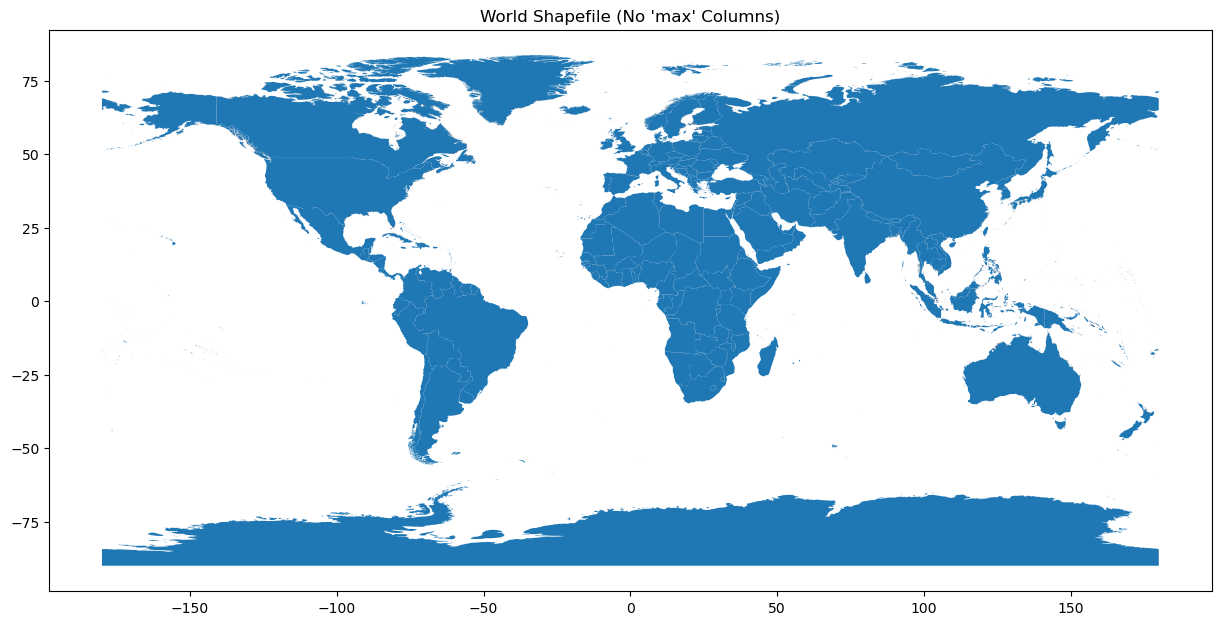

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
df_no_max_gdf.plot(ax=ax)
plt.title("World Shapefile (No 'max' Columns)")
plt.show()